<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion14/Clase_14-Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

**Ver la presentación  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion14/Clase14-arboles_y_random_forest.pdf)**
# Clase 14
## Árboles de decisión y Random Forest (Bosques Aleatorios)






In [367]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
data = {
    'Casado': [1, 0, 0, 0, 1, 1, 1, 0, 1],
    'Edad': [24, 18, 26, 19, 36, 29, 42, 32, 33],
    'Ingresos': [3.5, 0.7, 4, 2, 5.6, 7.1, 6.2, 4.1, 6.2]
}
df=pd.DataFrame(data)
df

,Casado,Edad,Ingresos
0,1,24,3.5
1,0,18,0.7
2,0,26,4.0
3,0,19,2.0
4,1,36,5.6
5,1,29,7.1
6,1,42,6.2
7,0,32,4.1
8,1,33,6.2


In [368]:
X = df[['Edad', 'Ingresos']]
y = df['Casado']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [369]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(criterion='entropy', random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


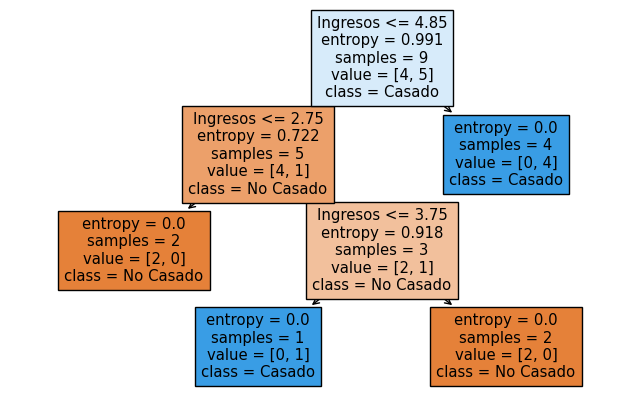

In [370]:
plt.figure(figsize=(8, 5))
plot_tree(clf, feature_names=['Edad', 'Ingresos'], class_names=['No Casado', 'Casado'], filled=True)
plt.show()

Vamos a crear un modelo pequeño de bosques aleatorios para predecir una variable categórica.<br>
Para esto vamos a usar una base de datos de viviendas en Boston<br>

## Ejercicio

**Objetivo:**
Vamos a utilizar regresión logística  para tratar de predecir si un pasajero sobrevivió o no.

**Pasos:**
1. Cargar el conjunto de datos: Usaremos el conjunto de datos del Titanic.

2. Preprocesar los datos: Hay que manejar valores faltantes y codificar las variables categóricas.

3. Entrenar el modelo de usando:
- Árboles de decisión


4. Evaluar el rendimiento de cada  modelo usando métricas de clasificación.

In [371]:
##importar la reunión
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [372]:
## Cargar los datos
titanic = sns.load_dataset('titanic')
data = titanic[['survived',  'sex', 'age', 'fare']]

In [373]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(891, 4)

In [374]:
##Rellenar faltantes de edad y volver numerica sexo
data['age']= data['age'].fillna(data['age'].mean())
data['sex']=np.where(data['sex']=='male',1,0)

<ipython-input-374-b96dd53c6570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']= data['age'].fillna(data['age'].mean())


In [375]:
#seleccionar variables X e y
X = data[['sex', 'age', 'fare']]
y = data['survived']


In [376]:
# dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [377]:
#inicializar árbol y entrenar
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [378]:
#hacer las predicciones
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


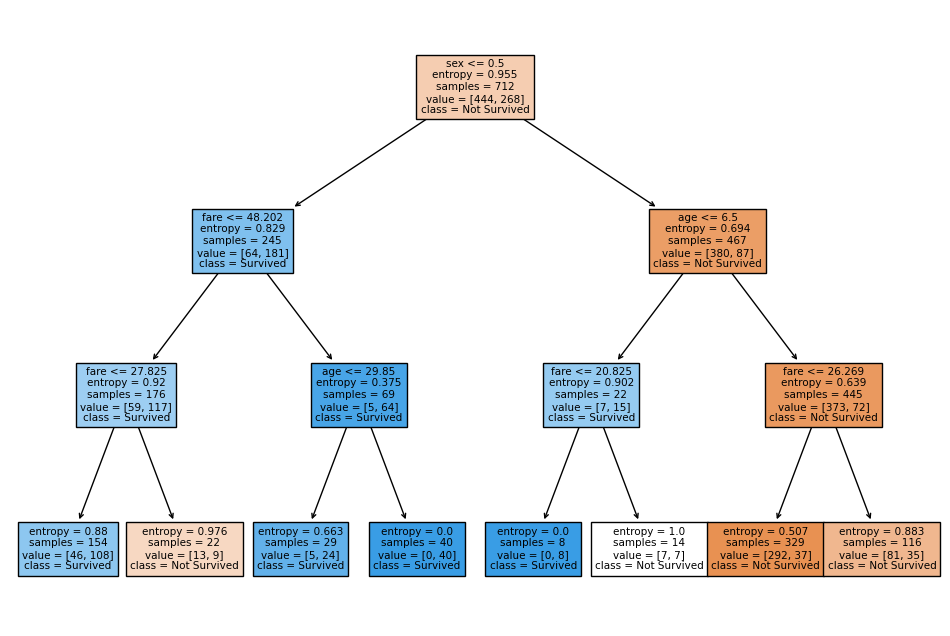

In [379]:
#gráfico del árbol
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['sex', 'age', 'fare'], class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [380]:
#información
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.76      0.87      0.81       105
    Survived       0.76      0.61      0.68        74

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.76      0.75       179



In [381]:
#cambio de umbral
umbral=0.9
y_pred_proba=clf.predict_proba(X_test)[:,1]
predictions_umbral=(y_pred_proba>=umbral).astype(int)
print(classification_report(y_test, predictions_umbral, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.62      1.00      0.76       105
    Survived       1.00      0.12      0.22        74

    accuracy                           0.64       179
   macro avg       0.81      0.56      0.49       179
weighted avg       0.78      0.64      0.54       179



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [382]:
y_pred_proba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.11246201, 0.11246201, 0.11246201, 0.40909091, 0.7012987 ,
       0.82758621, 0.7012987 , 0.11246201, 0.7012987 , 0.7012987 ,
       0.30172414, 0.11246201, 0.7012987 , 0.11246201, 0.11246201,
       0.40909091, 0.30172414, 0.7012987 , 0.11246201, 0.30172414,
       0.11246201, 0.30172414, 0.7012987 , 0.11246201, 0.11246201,
       0.30172414, 0.30172414, 0.11246201, 0.5       , 0.7012987 ,
       0.11246201, 0.7012987 , 0.30172414, 0.7012987 , 0.11246201,
       0.11246201, 0.30172414, 0.7012987 , 0.40909091, 0.11246201,
       0.30172414, 0.11246201, 0.11246201, 0.11246201, 0.7012987 ,
       0.30172414, 0.11246201, 0.11246201, 0.11246201, 0.30172414,
       0.7012987 , 1.        , 0.30172414, 0.30172414, 0.11246201,
       0.82758621, 0.11246201, 1.        , 0.7012987 , 0.7012987 ,
       0.11246201, 0.7012987 , 0.7012987 , 0.11246201, 0.11246201,
       0.7012987 , 0.30172414, 0.11246201, 0.11246201, 1.        ,
       0.7012987 , 0.82758621, 0.30172414, 1.        , 0.11246

In [383]:
#seleccionar mejor umbral
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
best_threshold

0.3017241379310345

In [384]:
#cambio de umbral
umbral=0.3017241379310345
y_pred_proba=clf.predict_proba(X_test)[:,1]
predictions_umbral=(y_pred_proba>=umbral).astype(int)
print(classification_report(y_test, predictions_umbral, target_names=['Not Survived', 'Survived']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

Not Survived       0.91      0.65      0.76       105
    Survived       0.64      0.91      0.75        74

    accuracy                           0.75       179
   macro avg       0.78      0.78      0.75       179
weighted avg       0.80      0.75      0.75       179



### Compárémoslo con la regresión logística

In [385]:
from sklearn.linear_model import LogisticRegression
modeloLog  = LogisticRegression(random_state=16)
modeloLog.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(random_state=16)

In [386]:
y_pred_log = modeloLog.predict(X_test)
y_pred_log

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [387]:
print(classification_report(y_test, y_pred_log))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [388]:
#seleccionar mejor umbral f1-scrore
y_pred_proba_log=modeloLog.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_log)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold_log = thresholds[np.argmax(f1_scores)]
best_threshold_log

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.18118303651503032

In [389]:
#cambio de umbral
umbral=0.18118303651503032
predictions_umbral_log=(y_pred_proba_log>=umbral).astype(int)
print(classification_report(y_test, predictions_umbral_log, target_names=['Not Survived', 'Survived']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

Not Survived       0.92      0.68      0.78       105
    Survived       0.67      0.92      0.77        74

    accuracy                           0.78       179
   macro avg       0.79      0.80      0.78       179
weighted avg       0.82      0.78      0.78       179





### Modelo de Árboles de Decisión


|                | precision | recall | f1-score | support |
|----------------|------------|--------|----------|---------|
| Not Survived   | 0.91       | 0.65   | 0.76     | 105     |
| Survived       | 0.64       | 0.91   | 0.75     | 74      |
| accuracy       |            |        | 0.75     | 179     |
| macro avg      | 0.78       | 0.78   | 0.75     | 179     |
| weighted avg   | 0.80       | 0.75   | 0.75     | 179     |


### Modelo de Regresión Logística


|                | precision | recall | f1-score | support |
|----------------|------------|--------|----------|---------|
| Not Survived   | 0.92       | 0.68   | 0.78     | 105     |
| Survived       | 0.67       | 0.92   | 0.77     | 74      |
| accuracy       |            |        | 0.78     | 179     |
| macro avg      | 0.79       | 0.80   | 0.78     | 179     |
| weighted avg   | 0.82       | 0.78   | 0.78     | 179     |


# Random Forest

In [390]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
#from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [391]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
datos = pd.read_csv(url)

# Visualizar los primeros registros del DataFrame
datos.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Datos


El set de datos Boston disponible en la librería scikitlearn contiene precios de viviendas de la ciudad de Boston, así como información socio-económica del barrio en el que se encuentran.

**objetivo:** Ajustar un modelo de regresión que permita predecir el precio medio de una vivienda ```(MEDV)``` en función de las variables disponibles.

Número de instancias(observaciones): 506

Número de atributos: 13 predictivos numéricos/categoriales.



Información de atributos (variables):
- `CRIM`: índice de criminalidad per cápita por ciudad
- `ZN`: proporción de suelo residencial para lotes de más de 25.000 pies cuadrados
- `INDUS`: proporción de acres comerciales no minoristas por ciudad
- `CHAS`: variable ficticia del río Charles (= 1 si la zona linda con el río; 0 en caso contrario)
- `NOX`: concentración de óxidos nítricos (partes por 10 millones)
- `RM`: número medio de habitaciones por vivienda
- `AGE`: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- `DIS`: distancias ponderadas a cinco centros de empleo de Boston
- `RAD`: índice de accesibilidad a las autopistas radiales
- `TAX`: tasa de impuesto sobre la propiedad por valor total de 10.000 $.
- `PTRATIO`: ratio alumnos-docente por ciudad
- `B`: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- `LSTAT`: % de estatus inferior de la población
- `MEDV`: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
Valores de atributos que faltan: Ninguno


Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset. https://archive.ics.uci.edu/ml/machine-learnin

In [392]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [393]:
datos.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='medv', ylabel='Count'>

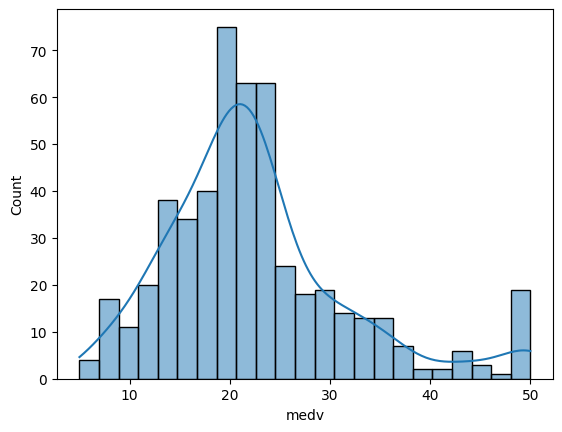

In [394]:
sns.histplot(datos["medv"], kde=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='medv'>

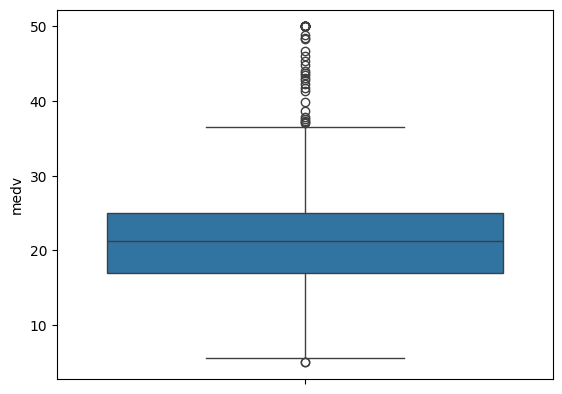

In [395]:
sns.boxplot(y=datos["medv"])

In [396]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Numero de cuartos vs valor medio de la vivienda')

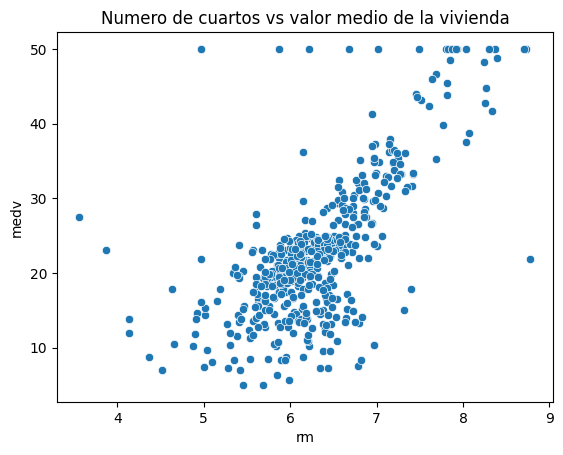

In [397]:
sns.scatterplot(data=datos, x="rm", y="medv")
plt.title("Numero de cuartos vs valor medio de la vivienda")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='crim', ylabel='medv'>

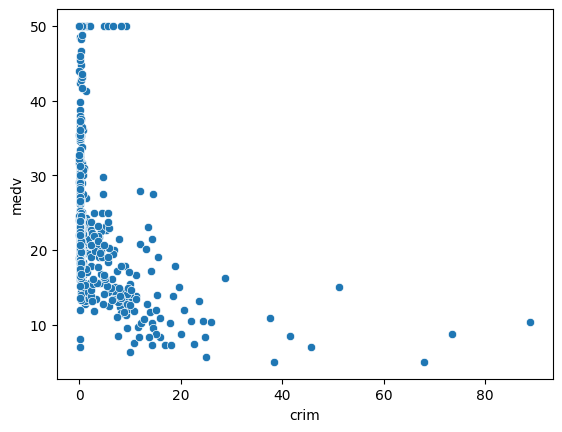

In [398]:
sns.scatterplot(data=datos, x="crim", y="medv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='b', ylabel='medv'>

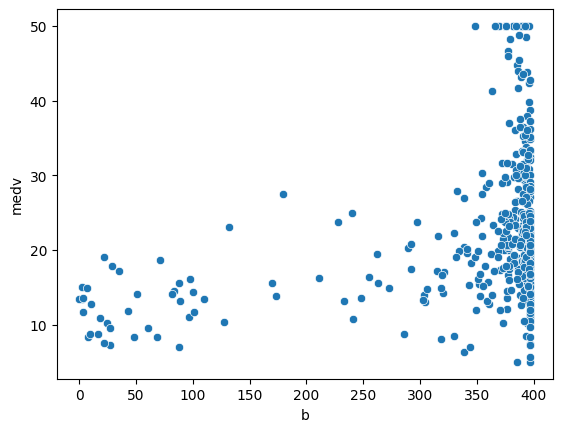

In [399]:
sns.scatterplot(x=datos["b"], y=datos["medv"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

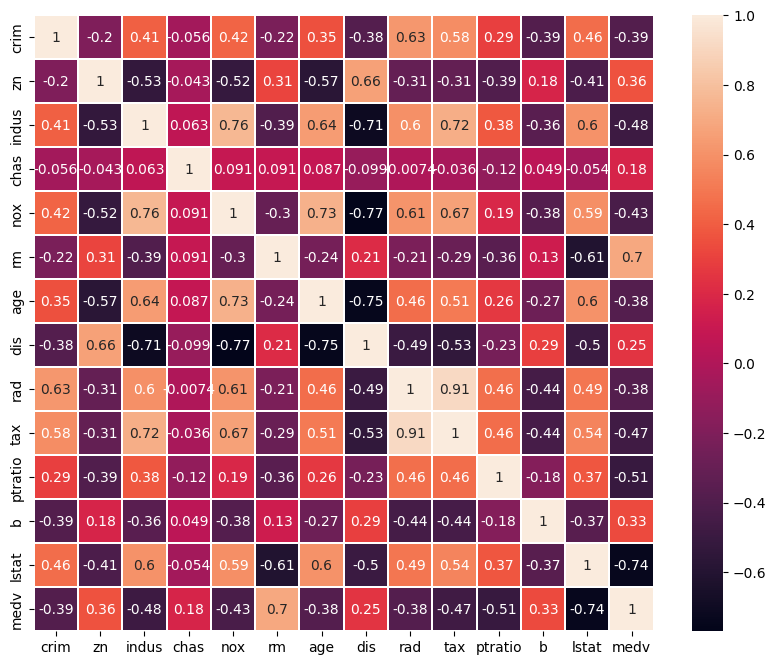

In [400]:
plt.figure(figsize = (10,8))
c=datos.corr()
sns.heatmap(c, annot=True, linewidths=.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


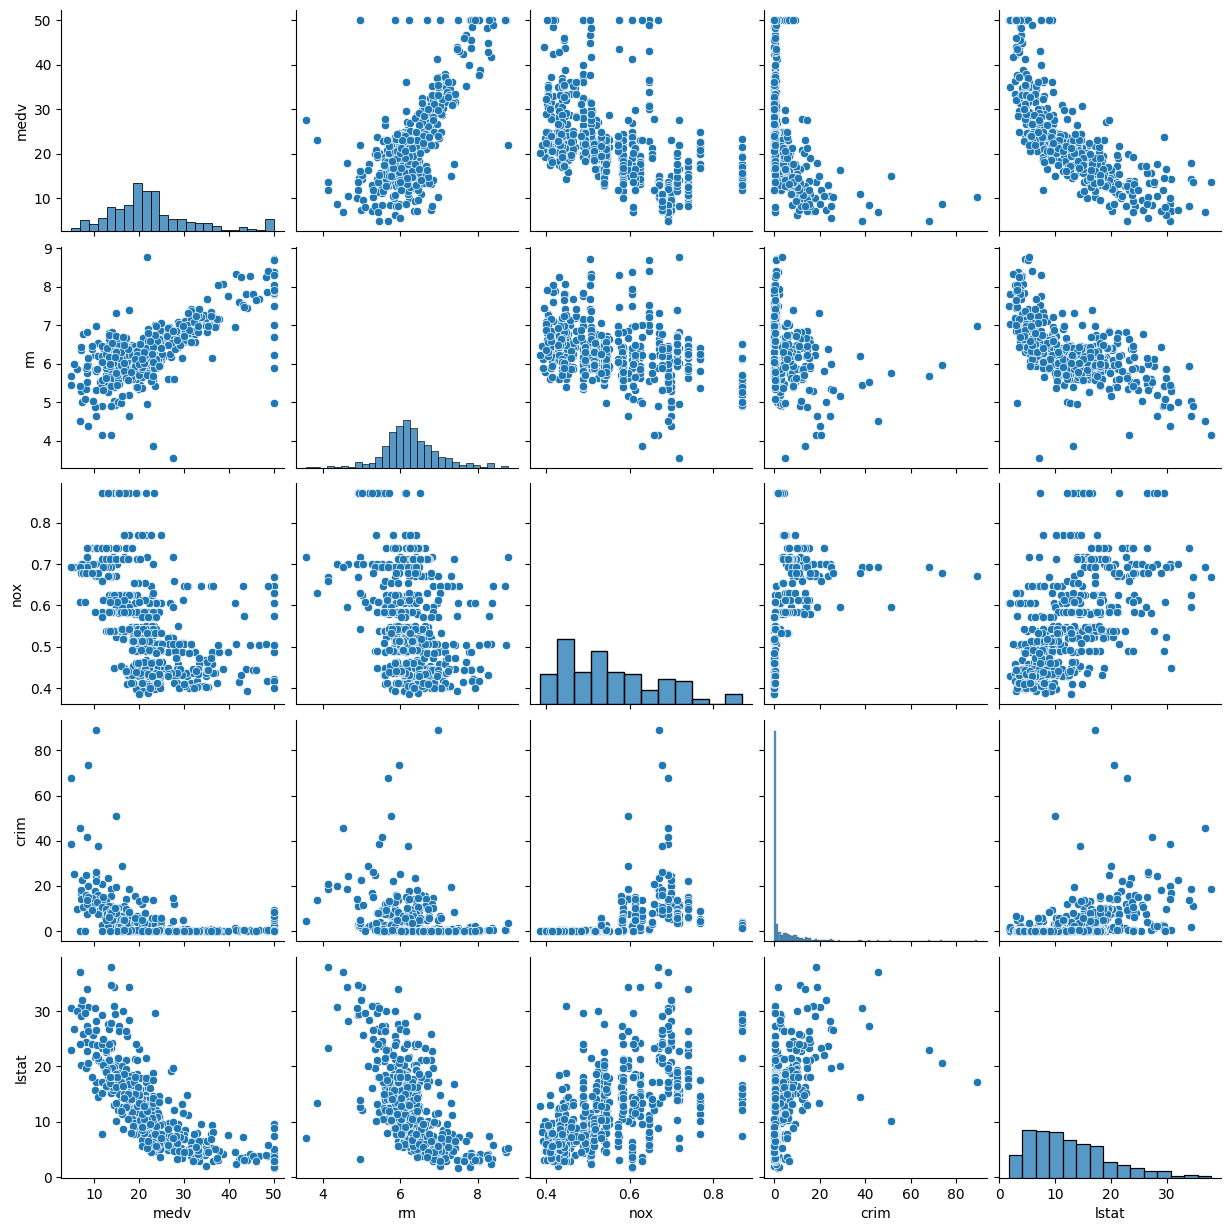

In [401]:
sns.pairplot(datos[["medv", "rm", "nox", "crim", "lstat"]])

### Ajuste del modelo

Se ajusta un modelo empleando como variable respuesta `MEDV` y como predictores todas las otras variables disponibles.

La clase `RandomForestRegressor` del módulo sklearn.ensemble permite entrenar modelos random forest para problemas de regresión. Los parámetros e hiperparámetros empleados por defecto son:

- `n_estimators=100`
- `criterion='mse'`
- `max_depth=None`
- `min_samples_split=2`
- min_samples_leaf=1
- min_weight_fraction_leaf=0.0
- max_features='auto'
- max_leaf_nodes=None
- min_impurity_decrease=0.0
- min_impurity_split=None
- bootstrap=True
- oob_score=False
- n_jobs=None
- random_state=None
- verbose=0
- warm_start=False
- ccp_alpha=0.0
- max_samples=None

De entre todos ellos, destacan aquellos que detienen el crecimiento de los árboles, los que controlan el número de árboles y predictores incluidos, y los que gestionan la paralelización:

- `n_estimators`: número de árboles incluidos en el modelo.

- `max_depth`: profundidad máxima que pueden alcanzar los árboles.

- `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

- `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

- `max_leaf_nodes`: número máximo de nodos terminales que pueden tener los árboles.

- `max_features`: número de predictores considerados a en cada división. Puede ser:

    + Un valor entero
    + Una fracción del total de predictores.
    + “auto”, utiliza todos los predictores.
    + “sqrt”, raiz cuadrada del número total de predictores.
    + “log2”, log2 del número total de predictores.
    + None, utiliza todos los predictores.
    + oob_score: Si se calcula o no el out-of-bag R^2. Por defecto es False ya que aumenta el tiempo de entrenamiento.

- `n_jobs`: número de cores empleados para el entrenamiento. En random forest los árboles se ajustan de forma independiente, por lo la paralelización reduce notablemente el tiempo de entrenamiento. Con -1 se utilizan todos los cores disponibles.

- `random_state: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.


Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

### División de los datos en train y test

In [402]:
# ==============================================================================

y=datos['medv']
X=datos.drop(columns = "medv")
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123
                                    )


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [403]:
X_train.shape
#X_test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(379, 13)

### Creación del modelo

[Información de la función](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [404]:
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'friedman_mse',
            max_depth    = None,
            max_features = 'sqrt',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )



In [405]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
335,0.03961,0.0,5.19,0,0.515,6.037,34.5,5.9853,5,224,20.2,396.90,8.01
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,292.29,14.43
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
322,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70
382,9.18702,0.0,18.10,0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60


### Entrenamiento del modelo

In [406]:
# ==============================================================================
modelo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=10, n_jobs=-1, random_state=123)

### Predicción y evaluación del modelo


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test

In [407]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.822633383448113


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [408]:
predicciones

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([19.61, 27.65, 45.56, 16.29, 30.97, 34.68, 26.16,  9.22, 19.11,
       27.87, 21.08, 19.97, 14.51, 30.8 , 19.8 , 18.62, 20.38, 40.94,
       18.72, 15.82, 15.04, 24.67, 32.34, 45.47, 35.49, 21.56, 15.52,
       21.59, 21.48, 18.97, 23.84, 34.26, 11.25, 21.9 , 21.97, 33.42,
       24.43, 12.84, 14.23, 47.17, 30.96, 18.18, 19.41, 48.64, 17.05,
       22.41, 20.99, 22.91, 16.48, 21.89, 32.23, 24.67, 20.51, 10.62,
       22.88, 13.97, 14.31, 10.34, 33.45, 11.9 , 18.48, 18.7 , 17.25,
       18.71, 22.18, 23.23, 24.1 , 18.99, 23.98, 30.02, 20.95, 24.93,
       17.13, 26.55, 16.08, 19.25, 12.26, 19.02, 29.14, 15.49, 32.32,
       11.21, 23.37, 21.38, 19.64, 23.52, 15.51, 20.07, 21.3 , 30.43,
       11.96, 35.33, 19.36, 24.89, 35.2 , 29.85, 16.88, 33.1 , 25.35,
       35.75, 21.18, 15.33, 45.01, 13.73, 20.4 , 28.55, 20.63, 15.17,
       20.98, 26.11, 20.66, 20.86, 16.76, 18.32, 14.74, 26.77, 25.85,
       13.39, 19.27, 19.73, 18.47, 37.21, 22.53, 10.33, 15.39, 22.38,
       22.59])

In [409]:
a=y_test.reset_index()

In [410]:
a.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['index', 'medv'], dtype='object')

Text(0.5, 0, ' Observaciones')

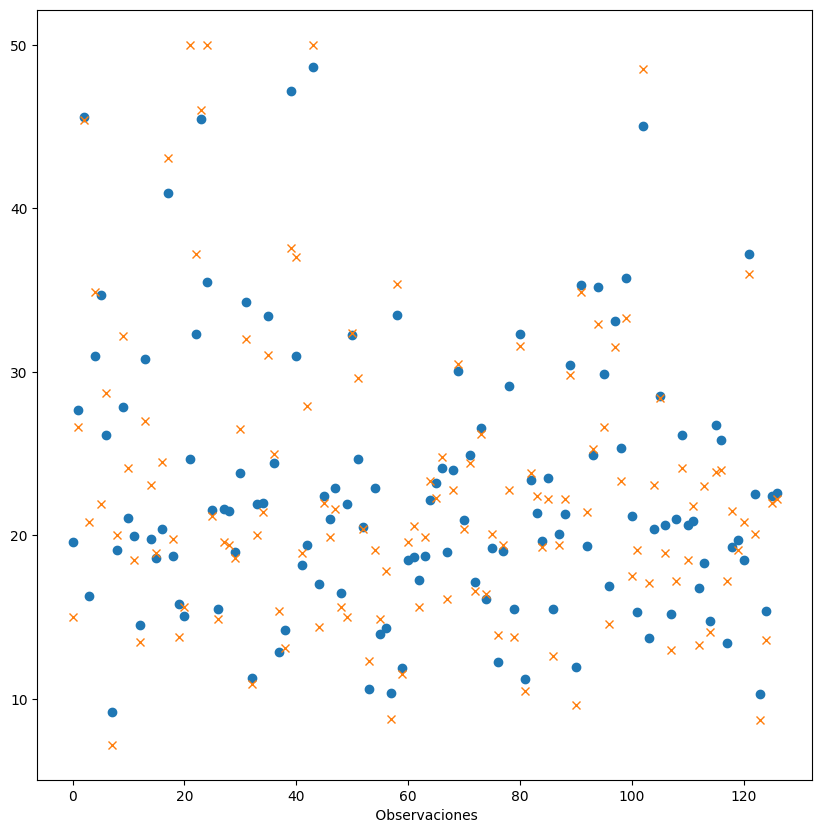

In [411]:
plt.figure(figsize=(10,10))
plt.plot(predicciones, "o")
plt.plot(a["medv"], "x")
plt.xlabel(" Observaciones")

Text(0, 0.5, 'Predicción')

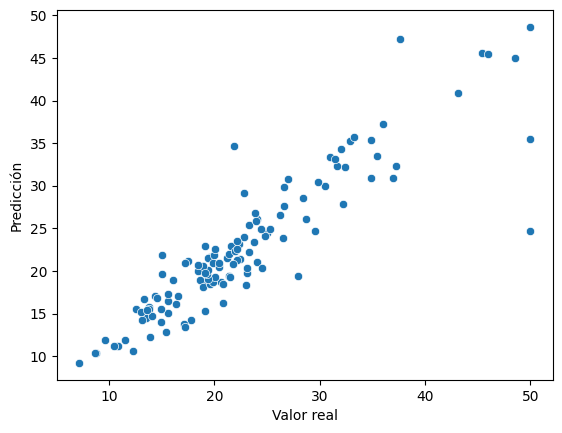

In [412]:
sns.scatterplot(x=a["medv"], y=predicciones )
plt.xlabel("Valor real")
plt.ylabel("Predicción")

## Optimización de hiperparámetros


- El modelo inicial se ha entrenado utilizando 10 árboles (n_estimators=10) y manteniendo el resto de hiperparámetros con su valor por defecto.

- Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.

-Los modelos Random Forest tienen la ventaja de disponer del Out-of-Bag error, lo que permite obtener una estimación del error de test sin recurrir a la validación cruzada, que es computacionalmente costosa.

En la implementación de `RandomForestRegressor`, la métrica devuelta como `oob_score` es el  R2 , si se desea otra, se tiene que recurrir al método oob_decision_function_() para obtener las predicciones y con ellas calcular la métrica de interés. Para una explicación más detallada consultar: Grid search de modelos Random Forest con out-of-bag error y early stopping.

Cabe tener en cuenta que, cuando se busca el valor óptimo de un hiperparámetro con dos métricas distintas, el resultado obtenido raramente es el mismo. Lo importante es que ambas métricas identifiquen las mismas regiones de interés.

## Número de árboles


En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Valor óptimo de n_estimators: 141


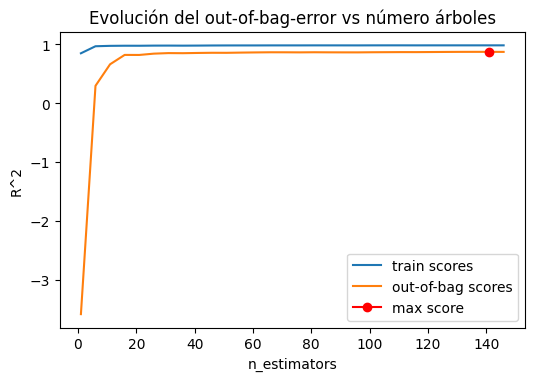

In [413]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'friedman_mse',
                max_depth    = None,
                max_features = 'sqrt',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

mbas métricas indican que, a partir de entre 20 y 60 árboles, el error de validación del modelo se estabiliza.

### Importancia de predictores


Importancia por pureza de nodos

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "medv").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

## Para tener en cuenta

En **RandomForestRegressor** y **RandomForestClassifier**, se utilizan diferentes criterios para ajustar el modelo según el tipo de tarea, ya sea **regresión** o **clasificación**.

### Para **Regresión**:
En el caso de regresión, el modelo intenta minimizar el error entre los valores predichos y los valores reales. Los criterios más comunes son:

1. **Mean Squared Error (MSE)**: Es el valor predeterminado en `RandomForestRegressor`. El modelo intenta minimizar la suma de los cuadrados de las diferencias entre los valores predichos y los valores reales.

   ```python
   from sklearn.ensemble import RandomForestRegressor
   
   model = RandomForestRegressor(criterion='squared_error')  # Por defecto, 'squared_error'
   ```

   Este criterio es el más utilizado, ya que castiga los errores grandes de manera más severa.

2. **Mean Absolute Error (MAE)**: Minimiza la suma de las diferencias absolutas entre los valores predichos y los valores reales. Es más robusto ante valores atípicos que el MSE.

   ```python
   model = RandomForestRegressor(criterion='absolute_error')
   ```

### Para **Clasificación**:
En clasificación, el objetivo es minimizar los errores de clasificación. Los criterios más comunes son:

1. **Gini Impurity**: Es el criterio predeterminado en `RandomForestClassifier`. Mide la probabilidad de que una instancia clasificada al azar se etiquete incorrectamente según la distribución de las clases en el nodo.

   ```python
   from sklearn.ensemble import RandomForestClassifier
   
   model = RandomForestClassifier(criterion='gini')  # Por defecto
   ```

2. **Entropy (Information Gain)**: Este criterio mide la cantidad de información obtenida al dividir los datos en clases. Un menor valor de entropía indica una mejor partición.

   ```python
   model = RandomForestClassifier(criterion='entropy')
   ```

### ¿Cuál utilizar?

- Para **regresión**, **MSE** es una buena opción predeterminada, ya que da un mayor peso a los errores grandes.
- Para **clasificación**, **Gini** suele ser más eficiente en términos de cálculo, mientras que **Entropy** puede producir divisiones más precisas, aunque a un costo computacional mayor.


## Ejercicio

**Objetivo:**
Vamos a utilizar un Bosque Aleatorio para tratar de predecir si un pasajero sobrevivió o no.

**Pasos:**
1. Cargar el conjunto de datos: Usaremos el conjunto de datos del Titanic.

2. Preprocesar los datos: Hay que manejar valores faltantes y codificar las variables categóricas.

3. Entrenar el modelo de usando:
- Bosques Aleatorios

4. Evaluar el rendimiento de cada  modelo usando métricas de clasificación.


construye el modelo usando

```python
RandomForestClassifier(criterion='entropy')
```

recuerda importar la función de ```sklearn``` y revisay compara con los modelos logístico y de árbol de decisión.

Juega con algunos hiperparámetros


In [ ]:
titanic = sns.load_dataset('titanic')
data = titanic[['survived',  'sex', 'age', 'fare']]
data

In [ ]:
### Manejo de valores faltantes
# Rellenamos los valores faltantes en 'age' con la media


# Convertir la variable categórica 'sex' a numérica




In [ ]:
X = data[[ 'sex', 'age', 'fare']]
y = data['survived']

##completar el código  modelo de árbol de clasificación




In [ ]:
##Revisa que tan bien lo hizo mirando las clasificaciones correctas usando matrix de confusión, accuracy, precision y recall



In [ ]:
##completar el código  modelo de bosques aleatorios




In [ ]:
##Revisa que tan bien lo hizo mirando las clasificaciones correctas usando matrix de confusión, accuracy, precision y recall





¿Qué modelo tuvo mejor comportamiento?